# Method of Moments and Maximum Likelihood estimation

### The example of a Beta model

[0.03613599 0.61631475 0.00599853 ... 0.23542418 0.00548306 0.82538336]
[3.02722947]


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17896\627348098.py:77: RuntimeWarning: divide by zero encountered in log
  loglikelihood = np.log(L)- (L * xi)


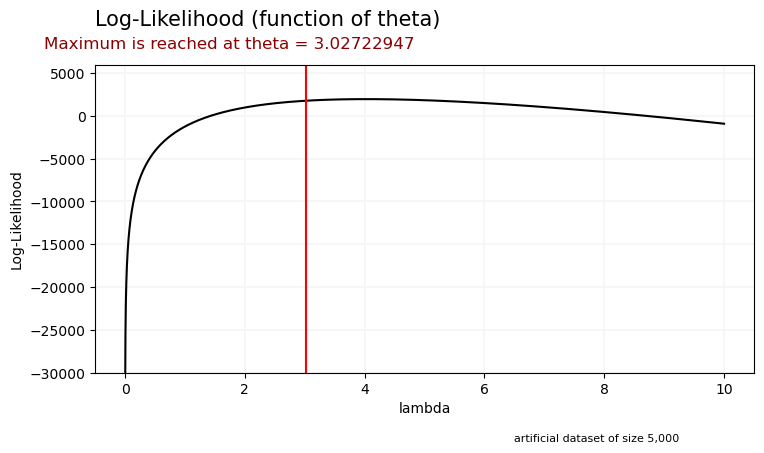

In [3]:
import numpy as np
np.random.seed(2023)

from scipy.stats import beta
# one realization of a Beta(1/theta, 1) with theta = 3
theta = 3
beta.rvs(a = 1/theta, size = 1, b = 1)
# array([0.03613599])

import statistics
# on average, we should get one.
statistics.mean(beta.rvs(a = 1/theta, size = 100000, b = 1))
# 0.24922457399140857

# Method of Moments estimator
def MoMBeta(x):
  
  n = len(x)
  sample_moment = np.sum(x) / n
  
  theta_mom = (1 / sample_moment) -1
  alpha_mom = 1 / theta_mom
  
  return theta_mom, alpha_mom

# generate artificial data, sample of size 10,000
np.random.seed(2023)
x = beta.rvs(a = 1/3, size = 100000, b = 1)

# apply MoMgamma()
MoMBeta(x = x)
# (2.9968621974937864, 0.3336823430974835)

#---------------------------------
# 2. Maximum Likelihood estimation
#---------------------------------

# generate a sample of size 5000 from a Beta distribution
np.random.seed(2023)
n = 5000
theta = 3 # true value of the parameter, that we wish to estimate
xi = beta.rvs(a = 1/theta, size = 5000, b = 1)
print(xi)
# [0.03613599 0.61631475 0.00599853 ... 0.23542418 0.00548306 0.82538336]

# Closed-form MLE
theta_hat_formula = 1 / ( - (n / np.sum(np.log(xi))) )  
theta_hat_formula 
# [1] 3.0272294817747585

#T numerical optimization
from scipy import stats

def llikelihood(Theta):  
    # log-likelihood function
    ll = -np.sum(stats.beta.logpdf(xi, a = 1/Theta, b = 1))
    return ll

from scipy.optimize import minimize

# Numerical approximation of the MLE using minimize()
mle = minimize(llikelihood, 
                   x0 = 4, 
                   method = 'BFGS')
print(mle.x)
# [3.02722947]

# Plot the Log-Likelihood function
import matplotlib.pyplot as plt

# set a range of possible parameter values
possibletheta = np.linspace(start = 0, stop = 10, num = 5000)

# compute the log-likelihood function for all possible parameter values
LL = []
for L in possibletheta:
    loglikelihood = np.log(L)- (L * xi)
    LL.append(loglikelihood.sum())

# plotting using matplotlib
px = 1/plt.rcParams['figure.dpi'] 
plt.figure(figsize=(850*px, 400*px))
plt.plot(possibletheta, LL, color = 'black')
plt.axvline(x = mle.x,  color = 'red')
plt.ylim([-30000, 6000])
plt.xlabel('lambda')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood (function of theta)', fontsize = 15, y = 1.1, loc = 'left')
plt.suptitle('Maximum is reached at theta = 3.02722947', y = 0.95, color = 'darkred', x = 0.283)
caption = 'artificial dataset of size 5,000'
plt.text(6.5,-38000, caption, fontsize = 8)
plt.grid(color = 'whitesmoke', linestyle = '-', linewidth = 1.2)